In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import zipfile
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')


def SMA(S, L):
    n = np.size(S)
    M = np.zeros(n)
    for i in range(0, n):
        if i < L-1:
            M[i] = np.NaN
        else:
            M[i] = np.mean(S[i-L+1:i+1])
    return M


z = zipfile.ZipFile("D:\HISTDATA_COM_XLSX_EURUSD_M12018.zip")
z.extractall()

df = pd.read_excel('DAT_XLSX_EURUSD_M1_2018.xlsx', sheet_name='2018', header=None, names=[
    'DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume'])
# print(df.head(5))

df['MA1'] = SMA(df['Bar CLOSE Bid Quote'], 5)

df['MA2'] = df.rolling(window=10,center=True)['Bar CLOSE Bid Quote'].mean()
df['MA3'] = df.rolling(window=15,center=True)['Bar CLOSE Bid Quote'].mean()
df['MA4'] = df.rolling(window=30,center=True)['Bar CLOSE Bid Quote'].mean()

print(df.head(40))





        DateTime Stamp  Bar OPEN Bid Quote  Bar HIGH Bid Quote   
0  2018-01-01 17:00:00             1.20037             1.20100  \
1  2018-01-01 17:01:00             1.20083             1.20095   
2  2018-01-01 17:02:00             1.20035             1.20043   
3  2018-01-01 17:03:00             1.20041             1.20050   
4  2018-01-01 17:04:00             1.20049             1.20049   
5  2018-01-01 17:05:00             1.20050             1.20050   
6  2018-01-01 17:06:00             1.20050             1.20069   
7  2018-01-01 17:07:00             1.20048             1.20054   
8  2018-01-01 17:08:00             1.20051             1.20087   
9  2018-01-01 17:09:00             1.20082             1.20097   
10 2018-01-01 17:10:00             1.20094             1.20095   
11 2018-01-01 17:11:00             1.20084             1.20088   
12 2018-01-01 17:12:00             1.20088             1.20088   
13 2018-01-01 17:13:00             1.20080             1.20080   
14 2018-01

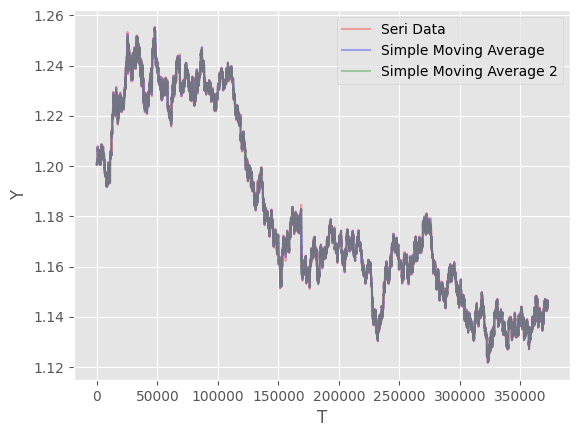

In [48]:
#plt.style.use('ggplot')
plt.plot(df['Bar CLOSE Bid Quote'], label='Seri Data', c='r',alpha=0.3)
plt.plot( df['MA1'], label = 'Simple Moving Average ',
c = 'b',alpha=0.3)
plt.plot( df['MA4'], label = 'Simple Moving Average 2',
c = 'g',alpha=0.3)
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.show()

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import zipfile
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')


def SMA(S, L):
    n = np.size(S)
    M = np.zeros(n)
    for i in range(0, n):
        if i < L-1:
            M[i] = np.NaN
        else:
            M[i] = np.mean(S[i-L+1:i+1])
    return M


z = zipfile.ZipFile('D:\HISTDATA_COM_XLSX_EURUSD_M12018.zip')
z.extractall()

df = pd.read_excel('DAT_XLSX_EURUSD_M1_2018.xlsx', sheet_name='2018', header=None, names=[
    'DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume'])
# print(df.head(5))

df['MA1'] = SMA(df['Bar CLOSE Bid Quote'], 5)

df['MA2'] = df.rolling(window=10)['Bar CLOSE Bid Quote'].mean()
df['MA3'] = df.rolling(window=15)['Bar CLOSE Bid Quote'].mean()
df['MA4'] = df.rolling(window=30)['Bar CLOSE Bid Quote'].mean()

print(df.head(40))





        DateTime Stamp  Bar OPEN Bid Quote  Bar HIGH Bid Quote   
0  2018-01-01 17:00:00             1.20037             1.20100  \
1  2018-01-01 17:01:00             1.20083             1.20095   
2  2018-01-01 17:02:00             1.20035             1.20043   
3  2018-01-01 17:03:00             1.20041             1.20050   
4  2018-01-01 17:04:00             1.20049             1.20049   
5  2018-01-01 17:05:00             1.20050             1.20050   
6  2018-01-01 17:06:00             1.20050             1.20069   
7  2018-01-01 17:07:00             1.20048             1.20054   
8  2018-01-01 17:08:00             1.20051             1.20087   
9  2018-01-01 17:09:00             1.20082             1.20097   
10 2018-01-01 17:10:00             1.20094             1.20095   
11 2018-01-01 17:11:00             1.20084             1.20088   
12 2018-01-01 17:12:00             1.20088             1.20088   
13 2018-01-01 17:13:00             1.20080             1.20080   
14 2018-01

In [94]:
x=np.random.randint(0,10, 10)
print(x)
print(x[[0,1]])

[5 0 3 5 4 3 6 6 6 6]
[5 0]


In [70]:
np.argsort(x)

array([0, 1, 2, 3, 4], dtype=int64)

In [71]:
x=np.array([[5, 7], [5, 4]])   
np.sort(x, axis=1)                                                 

array([[5, 7],
       [4, 5]])

In [72]:
x = np.array([2, 1, 4, 3, 5])
np.partition(x,3)

array([3, 2, 1, 4, 5])

In [104]:
data = pd.DataFrame([['a', 'b'],[ 'c',np.NaN],['q',np.NaN],[np.NaN,'e']], index=[1, 3, 5,7],columns=['first','second'])
print(data)
print(data.dropna(axis=1))


  first second
1     a      b
3     c    NaN
5     q    NaN
7   NaN      e
Empty DataFrame
Columns: []
Index: [1, 3, 5, 7]


In [105]:
np.argsort(x)

array([1, 0, 3, 2, 4], dtype=int64)

In [87]:
print(data.iloc[1:3])

3    b
5    c
dtype: object
